In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
%matplotlib inline

In [3]:
movie = pd.read_csv('Movie_collection_train.csv')

In [4]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Collection           400 non-null    int64  
 1   Marketin_expense     400 non-null    float64
 2   Production_expense   400 non-null    float64
 3   Multiplex_coverage   400 non-null    float64
 4   Budget               400 non-null    float64
 5   Movie_length         400 non-null    float64
 6   Lead_ Actor_Rating   400 non-null    float64
 7   Lead_Actress_rating  400 non-null    float64
 8   Director_rating      400 non-null    float64
 9   Producer_rating      400 non-null    float64
 10  Critic_rating        400 non-null    float64
 11  Trailer_views        400 non-null    int64  
 12  Time_taken           392 non-null    float64
 13  Twitter_hastags      400 non-null    float64
 14  Genre                400 non-null    object 
 15  Avg_age_actors       400 non-null    int

In [5]:
movie

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,Thriller,23,PG,494,YES
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,Drama,42,PG,462,NO
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,Comedy,38,PG,458,NO
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,Drama,45,PG,472,YES
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,Drama,55,PG,395,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,26200,194.3350,91.20,0.307,35946.405,172.3,8.980,9.260,9.085,9.225,7.96,424127,115.24,302.096,Action,29,PG,712,NO
396,25000,137.4410,91.20,0.307,35579.775,169.5,9.115,9.180,9.100,9.255,6.96,390048,109.00,222.000,Thriller,24,PG,685,YES
397,17000,173.4404,91.20,0.307,31924.585,172.4,9.135,9.230,9.125,9.240,6.96,384688,185.40,281.360,Comedy,22,PG,663,NO
398,10000,787.0360,91.20,0.307,30291.415,173.5,9.215,9.370,9.105,9.330,6.96,291101,186.00,260.800,Drama,26,PG,653,NO


In [6]:
movie.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,Thriller,23,PG,494,YES
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,Drama,42,PG,462,NO
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,Comedy,38,PG,458,NO
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,Drama,45,PG,472,YES
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,Drama,55,PG,395,NO


In [7]:
movie.columns

Index(['Collection', 'Marketin_expense', 'Production_expense',
       'Multiplex_coverage', 'Budget', 'Movie_length', 'Lead_ Actor_Rating',
       'Lead_Actress_rating', 'Director_rating', 'Producer_rating',
       'Critic_rating', 'Trailer_views', 'Time_taken', 'Twitter_hastags',
       'Genre', 'Avg_age_actors', 'MPAA_film_rating', 'Num_multiplex',
       '3D_available'],
      dtype='object')

In [9]:
movie.shape

(400, 19)

In [8]:
movie.isnull().sum()

Collection             0
Marketin_expense       0
Production_expense     0
Multiplex_coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             8
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
MPAA_film_rating       0
Num_multiplex          0
3D_available           0
dtype: int64

MPAA_film_rating column we could see only 1 entry for all the rows i.e. 'PG' , so that we remove/drop the column

In [10]:
movie['MPAA_film_rating'].unique()

array(['PG'], dtype=object)

In [11]:
movie['Time_taken'].mean()

157.79

Filling NAN values with mean value of 'Time_taken' and creating a new feature called Time_taken_mean

In [16]:
movie['Time_taken_mean'] = movie['Time_taken'].fillna(movie['Time_taken'].mean())

In [23]:
movie.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available,Time_taken_mean
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,Thriller,23,PG,494,YES,109.60
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,Drama,42,PG,462,NO,146.64
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,Comedy,38,PG,458,NO,147.88
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,Drama,45,PG,472,YES,185.36
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,Drama,55,PG,395,NO,176.48


In [24]:
movie.isnull().sum()

Collection             0
Marketin_expense       0
Production_expense     0
Multiplex_coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             8
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
MPAA_film_rating       0
Num_multiplex          0
3D_available           0
Time_taken_mean        0
dtype: int64

In [25]:
movie['3D_available'].unique()

array(['YES', 'NO'], dtype=object)

3D_available column we see two values i.e. YES and NO, So replacing YES with 1 and NO with 0.

In [30]:
movie['3D_available_new'] = np.where(movie['3D_available']=='YES',1,0)

In [33]:
movie.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,...,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available,Time_taken_mean,3D_available_new
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,...,527367,109.60,223.840,Thriller,23,PG,494,YES,109.60,1
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,...,494055,146.64,243.456,Drama,42,PG,462,NO,146.64,0
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,...,547051,147.88,2022.400,Comedy,38,PG,458,NO,147.88,0
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,...,516279,185.36,225.344,Drama,45,PG,472,YES,185.36,1
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,...,531448,176.48,225.792,Drama,55,PG,395,NO,176.48,0


Dropping 3 columns (MPAA_film_rating','Time_taken','3D_available) which were re-created with newly.

In [34]:
movie.drop(['MPAA_film_rating','Time_taken','3D_available'],axis=1,inplace=True)

In [35]:
movie.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Time_taken_mean,3D_available_new
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,223.840,Thriller,23,494,109.60,1
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,243.456,Drama,42,462,146.64,0
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,2022.400,Comedy,38,458,147.88,0
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,225.344,Drama,45,472,185.36,1
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,225.792,Drama,55,395,176.48,0


In [37]:
movie['Genre'].unique() #Here we can see 4 types so that we can use LabelEncoder

array(['Thriller', 'Drama', 'Comedy', 'Action'], dtype=object)

In [39]:
label_encoder = preprocessing.LabelEncoder()
movie['Genre_new'] = label_encoder.fit_transform(movie['Genre'])

In [41]:
movie.head(20)

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Time_taken_mean,3D_available_new,Genre_new
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,223.840,Thriller,23,494,109.60,1,3
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,243.456,Drama,42,462,146.64,0,2
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,2022.400,Comedy,38,458,147.88,0,1
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,225.344,Drama,45,472,185.36,1,2
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,225.792,Drama,55,395,176.48,0,2
5,57400,20.5970,59.36,0.542,35718.650,132.2,6.890,7.100,6.885,7.005,7.26,498425,284.592,Comedy,53,460,143.48,1,1
6,45800,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,243.664,Thriller,41,522,139.16,1,3
7,44200,22.8910,70.74,0.476,34285.460,169.6,6.980,7.075,6.875,7.170,7.96,400821,243.536,Drama,56,571,116.84,0,2
8,33000,24.2248,70.74,0.476,31280.205,173.5,6.910,7.075,6.850,7.000,7.96,295168,242.640,Comedy,55,564,118.60,1,1
9,37800,23.4008,70.74,0.476,33352.220,159.4,6.665,6.725,6.575,6.855,7.96,412012,283.024,Thriller,45,508,189.56,1,3


In [42]:
movie.drop('Genre',axis=1,inplace=True) # As new column Genre_new is replaced

In [43]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Collection           400 non-null    int64  
 1   Marketin_expense     400 non-null    float64
 2   Production_expense   400 non-null    float64
 3   Multiplex_coverage   400 non-null    float64
 4   Budget               400 non-null    float64
 5   Movie_length         400 non-null    float64
 6   Lead_ Actor_Rating   400 non-null    float64
 7   Lead_Actress_rating  400 non-null    float64
 8   Director_rating      400 non-null    float64
 9   Producer_rating      400 non-null    float64
 10  Critic_rating        400 non-null    float64
 11  Trailer_views        400 non-null    int64  
 12  Twitter_hastags      400 non-null    float64
 13  Avg_age_actors       400 non-null    int64  
 14  Num_multiplex        400 non-null    int64  
 15  Time_taken_mean      400 non-null    flo

In [46]:
movie.columns

Index(['Collection', 'Marketin_expense', 'Production_expense',
       'Multiplex_coverage', 'Budget', 'Movie_length', 'Lead_ Actor_Rating',
       'Lead_Actress_rating', 'Director_rating', 'Producer_rating',
       'Critic_rating', 'Trailer_views', 'Twitter_hastags', 'Avg_age_actors',
       'Num_multiplex', 'Time_taken_mean', '3D_available_new', 'Genre_new'],
      dtype='object')

In [47]:
movie.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Twitter_hastags,Avg_age_actors,Num_multiplex,Time_taken_mean,3D_available_new,Genre_new
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,223.840,23,494,109.60,1,3
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,243.456,42,462,146.64,0,2
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,2022.400,38,458,147.88,0,1
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,225.344,45,472,185.36,1,2
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,225.792,55,395,176.48,0,2


In [61]:
movie.shape

(400, 18)

In [76]:
features = iter([i for i in movie.columns if i !='Collection'])

<AxesSubplot:xlabel='Marketin_expense', ylabel='Collection'>

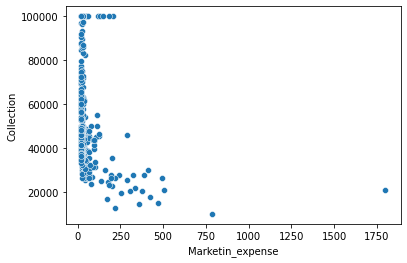

In [77]:
sns.scatterplot(x='Marketin_expense',y='Collection',data=movie)

After 750 we could see those are out of range and denoted as Outliers so we can remove them.

In [88]:
movie.drop(movie[movie['Marketin_expense']>750].index,inplace=True)

<AxesSubplot:xlabel='Marketin_expense', ylabel='Collection'>

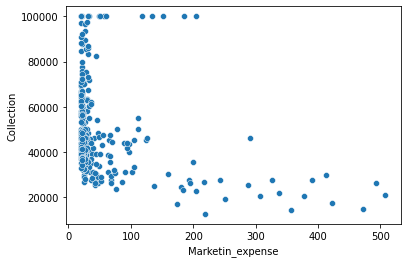

In [90]:
sns.scatterplot(x='Marketin_expense',y='Collection',data=movie)

<AxesSubplot:xlabel='Production_expense', ylabel='Collection'>

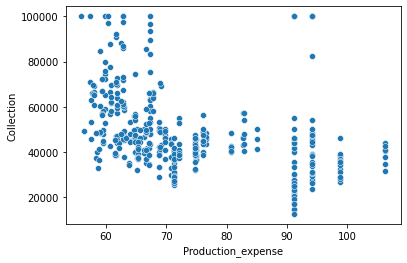

In [80]:
sns.scatterplot(x='Production_expense',y='Collection',data=movie)

<AxesSubplot:xlabel='Multiplex_coverage', ylabel='Collection'>

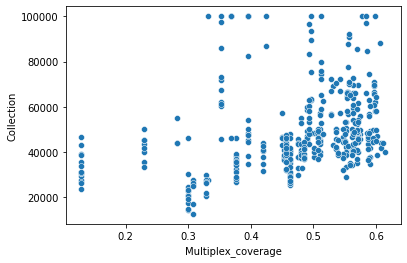

In [81]:
sns.scatterplot(x='Multiplex_coverage',y='Collection',data=movie)

<AxesSubplot:xlabel='Budget', ylabel='Collection'>

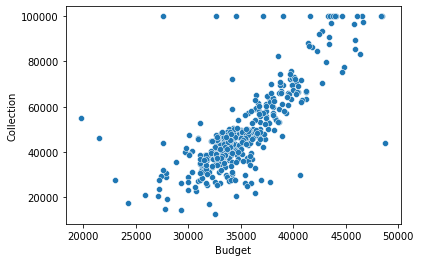

In [82]:
sns.scatterplot(x='Budget',y='Collection',data=movie)

<AxesSubplot:xlabel='Movie_length', ylabel='Collection'>

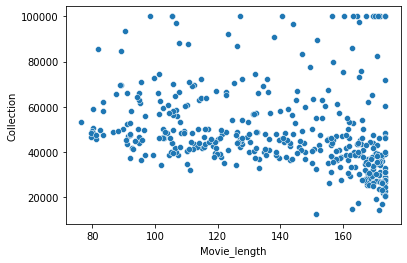

In [91]:
sns.scatterplot(x='Movie_length',y='Collection',data=movie)

<AxesSubplot:xlabel='Lead_ Actor_Rating', ylabel='Collection'>

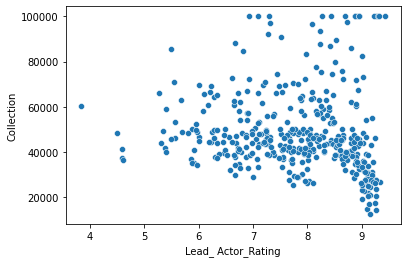

In [92]:
sns.scatterplot(x='Lead_ Actor_Rating',y='Collection',data=movie)

<AxesSubplot:xlabel='Lead_Actress_rating', ylabel='Collection'>

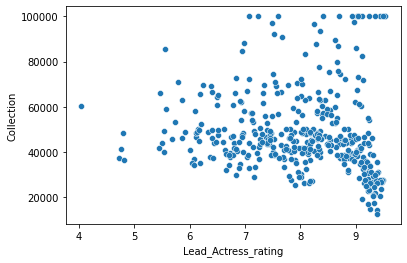

In [93]:
sns.scatterplot(x='Lead_Actress_rating',y='Collection',data=movie)

<AxesSubplot:xlabel='Director_rating', ylabel='Collection'>

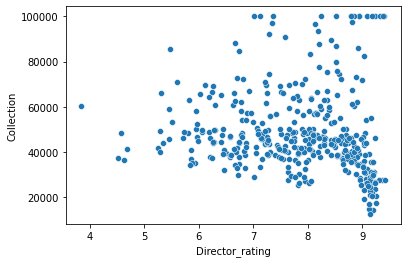

In [95]:
sns.scatterplot(x='Director_rating',y='Collection',data=movie)

<AxesSubplot:xlabel='Producer_rating', ylabel='Collection'>

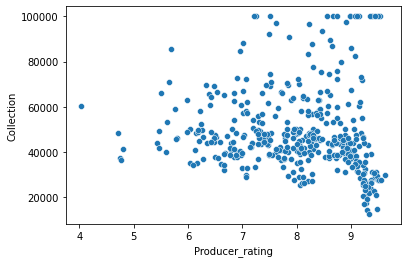

In [96]:
sns.scatterplot(x='Producer_rating',y='Collection',data=movie)

<AxesSubplot:xlabel='Critic_rating', ylabel='Collection'>

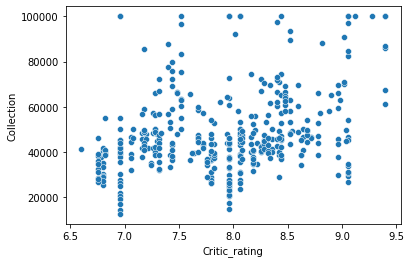

In [97]:
sns.scatterplot(x='Critic_rating',y='Collection',data=movie)

<AxesSubplot:xlabel='Trailer_views', ylabel='Collection'>

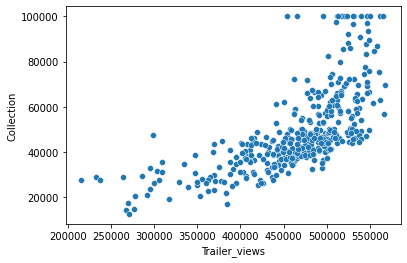

In [99]:
sns.scatterplot(x='Trailer_views',y='Collection',data=movie)

<AxesSubplot:xlabel='Twitter_hastags', ylabel='Collection'>

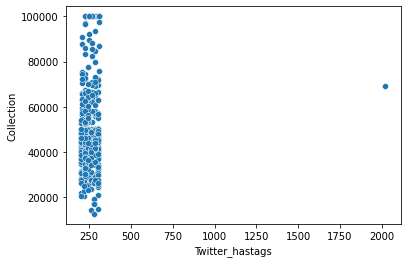

In [100]:
sns.scatterplot(x='Twitter_hastags',y='Collection',data=movie)

One of the datapoint is out of range, so here we can exculde/drop that and we can consider that as Outlier.

In [108]:
movie.drop(movie[movie['Twitter_hastags']>500].index,inplace=True)

<AxesSubplot:xlabel='Twitter_hastags', ylabel='Collection'>

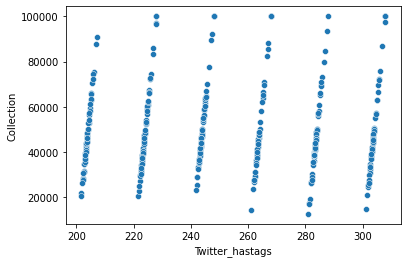

In [109]:
sns.scatterplot(x='Twitter_hastags',y='Collection',data=movie)

<AxesSubplot:xlabel='Avg_age_actors', ylabel='Collection'>

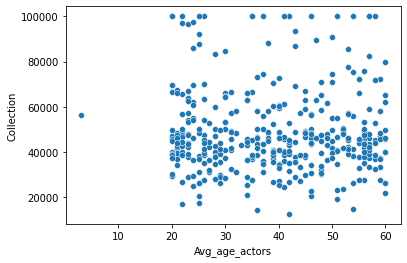

In [110]:
sns.scatterplot(x='Avg_age_actors',y='Collection',data=movie)

One of the datapoint is out of range from left, so here we can exculde/drop that and we can consider that as Outlier.

In [116]:
movie.drop(movie[movie['Avg_age_actors']<20].index, inplace=True)


<AxesSubplot:xlabel='Avg_age_actors', ylabel='Collection'>

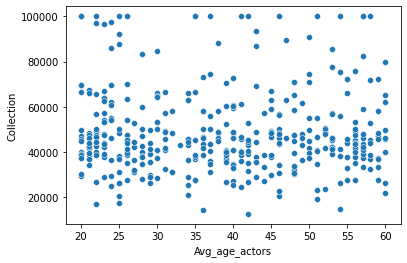

In [117]:
sns.scatterplot(x='Avg_age_actors',y='Collection',data=movie)

<AxesSubplot:xlabel='Num_multiplex', ylabel='Collection'>

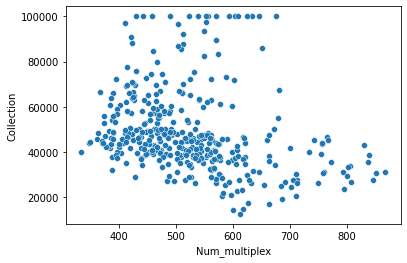

In [118]:
sns.scatterplot(x='Num_multiplex',y='Collection',data=movie)

<AxesSubplot:xlabel='Time_taken_mean', ylabel='Collection'>

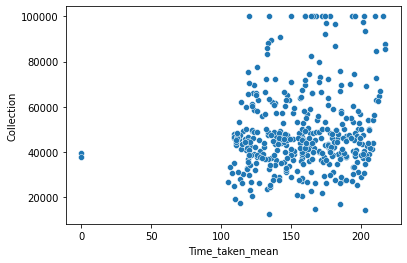

In [119]:
sns.scatterplot(x='Time_taken_mean',y='Collection',data=movie)

One of the datapoint is out of range from left, so here we can exculde/drop that and we can consider that as Outlier.

In [126]:
movie.drop(movie[movie['Time_taken_mean']<100].index, inplace=True)

<AxesSubplot:xlabel='Time_taken_mean', ylabel='Collection'>

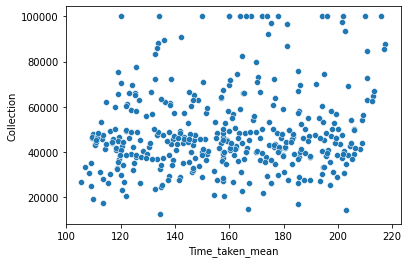

In [127]:
sns.scatterplot(x='Time_taken_mean',y='Collection',data=movie)

<AxesSubplot:xlabel='3D_available_new', ylabel='Collection'>

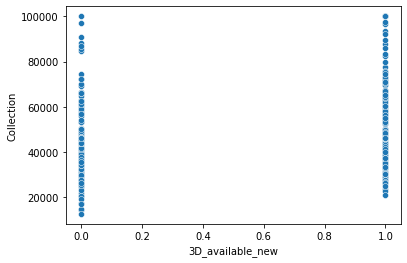

In [123]:
sns.scatterplot(x='3D_available_new',y='Collection',data=movie)

<AxesSubplot:xlabel='Genre_new', ylabel='Collection'>

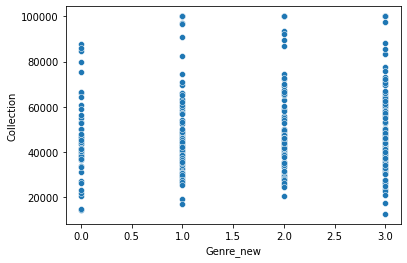

In [124]:
sns.scatterplot(x='Genre_new',y='Collection',data=movie)

<AxesSubplot:xlabel='Genre_new', ylabel='Collection'>

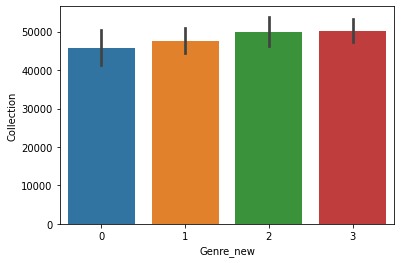

In [125]:
sns.barplot(x='Genre_new',y='Collection',data=movie)

<AxesSubplot:xlabel='3D_available_new', ylabel='Collection'>

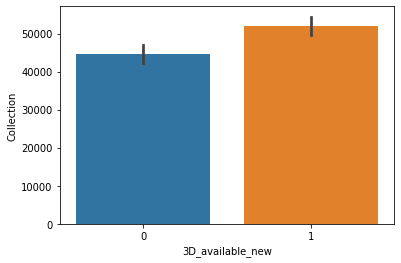

In [128]:
sns.barplot(x='3D_available_new',y='Collection',data=movie)

In [148]:
x1 = movie.drop('Collection',axis=1)
y1 = movie['Collection']

In [209]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(295, 17) (99, 17) (295,) (99,)


In [210]:
regressor = linear_model.LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [211]:
y_pred = regressor.predict(x_test)
df_predict = pd.DataFrame({'Actual':y_test,'Prediction':y_pred})/500
df_predict

,Actual,Prediction
116,84.8,88.864536
285,88.0,111.893467
70,96.8,110.890240
158,97.2,99.274818
333,88.8,103.982756
...,...,...
311,88.4,107.867485
282,184.0,145.943803
83,91.6,91.119235
347,92.4,102.060927


<AxesSubplot:ylabel='Density'>

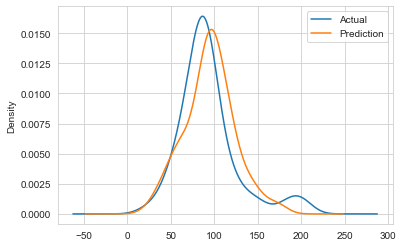

In [212]:
df_predict.plot.kde()

In [213]:
r2_score(y_test,y_pred)

0.6727511578178629